# Final Project: Deeplearning to detect eye diseses

First using a pretrained CNN model, retraining with own pictures

# Load Packages

In [32]:
import pandas as pd
import numpy as np

# deep learning
import keras
from keras.models import Model, Sequential
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
# inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# evaluating
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# others
import os

# Load Data

In [4]:
# get classes from train image set locally
CLASSES = os.listdir('data/train')
CLASSES

['cataract', 'glaucoma', 'diabetes', 'normal']

In [5]:
# instantiate image data generator
data_gen = image.ImageDataGenerator(
    # preprocessing function for all images
    preprocessing_function=preprocess_input
)

### Load Train Data

In [6]:
# load adn preprocess train data
train_data_gen = data_gen.flow_from_directory(
        directory='data/train',
        class_mode="categorical",
        classes=CLASSES,
        batch_size=400,
        target_size=(224,224)
)

Found 400 images belonging to 4 classes.


In [7]:
# crate xtrain and y train
xtrain, ytrain = next(train_data_gen)
xtrain.shape, ytrain.shape

((400, 224, 224, 3), (400, 4))

## Load Test Data

In [8]:
# preprocess test data 
test_data_gen = data_gen.flow_from_directory(
        directory='data/test',
        class_mode="categorical",
        classes=CLASSES,
        batch_size=40,
        target_size=(224,224)
)

Found 40 images belonging to 4 classes.


In [9]:
# create test set
xtest, ytest = next(test_data_gen)
xtest.shape, ytest.shape

((40, 224, 224, 3), (40, 4))

# Model Building

In [10]:
model_inc = InceptionV3(
    weights='imagenet', 
    input_shape=(299,299,3) # ignored if input tensor is provided
)

2023-03-05 08:48:13.476816: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model_inc.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

 batch_normalization_5 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 35, 35, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 35, 35, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 35, 35, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 35, 35, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 17, 17, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 17, 17, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 17, 17, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 17, 17, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 17, 17, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 17, 17, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 17, 17, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 17, 17, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 17, 17, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 17, 17, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 17, 17, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 17, 17, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 17, 17, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 17, 17, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 17, 17, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 8, 8, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 8, 8, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 8, 8, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 8, 8, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [12]:
# create base model
base_model = InceptionV3(
    weights='imagenet', 
    include_top=False,  # removal of final dense layers
    pooling='avg',      # average pooling to last convolutional layer's ouput
    input_shape=(224,224,3) # ignored if input tensor is provided
)

In [13]:
# freeze base model
base_model.trainable = False

In [14]:
# check base model
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                      

 batch_normalization_99 (BatchN  (None, 25, 25, 64)  192         ['conv2d_99[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_101 (Batch  (None, 25, 25, 64)  192         ['conv2d_101[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_104 (Batch  (None, 25, 25, 96)  288         ['conv2d_104[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_105 (Batch  (None, 25, 25, 32)  96          ['conv2d_105[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_116 (Batch  (None, 25, 25, 64)  192         ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_116[0][0]']
                                                                                                  
 conv2d_114 (Conv2D)            (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_117 (Conv2D)            (None, 25, 25, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_6[0][0]']        
                                                                                                  
 conv2d_128 (Conv2D)            (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_128 (Batch  (None, 12, 12, 128)  384        ['conv2d_128[0][0]']             
 Normaliza

                                                                  'activation_133[0][0]']         
                                                                                                  
 conv2d_138 (Conv2D)            (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_138 (Batch  (None, 12, 12, 160)  480        ['conv2d_138[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_138[0][0]']
                                                                                                  
 conv2d_139 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_138[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_148[0][0]']
                                                                                                  
 conv2d_149 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_149 (Batch  (None, 12, 12, 160)  480        ['conv2d_149[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_149[0][0]']
          

                                                                                                  
 batch_normalization_159 (Batch  (None, 12, 12, 192)  576        ['conv2d_159[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_159 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_159[0][0]']
                                                                                                  
 conv2d_155 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_160 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_159[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_164 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_168 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_167[0][0]']         
                                                                                                  
 batch_normalization_164 (Batch  (None, 12, 12, 192)  576        ['conv2d_164[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_168 (Batch  (None, 12, 12, 192)  576        ['conv2d_168[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_170 (Batch  (None, 5, 5, 320)   960         ['conv2d_170[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_172 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_172[0][0]']
                                                                                                  
 activation_173 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_173[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_176[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_177[0][0]']
          

                                                                                                  
 activation_185 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_185[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_186[0][0]']
                                                                                                  
 batch_normalization_187 (Batch  (None, 5, 5, 192)   576         ['conv2d_187[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 5, 5, 320)    0           ['batch_normalization_179[0][0]']
                                                                                                  
 mixed9_1 

In [15]:
# create model
K.clear_session()
model = Sequential()

In [16]:
# add base_model to model
model.add(base_model)

In [17]:
# add custom layer on top of base model 
# with same number of neurons as output form previous layer
model.add(Dense(512, activation='relu'))

In [18]:
# add dropout 
model.add(keras.layers.Dropout(rate=0.5))

In [19]:
# add output layer with number of neurons matching number of classes(4)
model.add(Dense(4, activation='softmax'))

In [20]:
# compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001), 
    loss=keras.losses.categorical_crossentropy,
    metrics=[keras.metrics.categorical_accuracy]
    )

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 22,853,924
Trainable params: 1,051,140
Non-trainable params: 21,802,784
_________________________________________________________________


In [22]:
# early stopping
stop_early = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10
)

In [23]:
# train model
training = model.fit(
            xtrain,
            ytrain,
            epochs=100,
            batch_size=20,
            callbacks=[stop_early],
            validation_split=0.2
)

Epoch 1/100
16/16 [==============================] - 20s 1s/step - loss: 1.5755 - categorical_accuracy: 0.4750 - val_loss: 1.0946 - val_categorical_accuracy: 0.5625
Epoch 2/100
16/16 [==============================] - 15s 943ms/step - loss: 0.9553 - categorical_accuracy: 0.6000 - val_loss: 1.2577 - val_categorical_accuracy: 0.5000
Epoch 3/100
16/16 [==============================] - 17s 1s/step - loss: 0.8212 - categorical_accuracy: 0.6344 - val_loss: 1.1800 - val_categorical_accuracy: 0.5500
Epoch 4/100
16/16 [==============================] - 16s 985ms/step - loss: 0.7092 - categorical_accuracy: 0.6438 - val_loss: 1.1025 - val_categorical_accuracy: 0.4875
Epoch 5/100
16/16 [==============================] - 17s 1s/step - loss: 0.6586 - categorical_accuracy: 0.7063 - val_loss: 1.0319 - val_categorical_accuracy: 0.5250
Epoch 6/100
16/16 [==============================] - 17s 1s/step - loss: 0.6655 - categorical_accuracy: 0.7250 - val_loss: 1.1681 - val_categorical_accuracy: 0.5375
Epoc

## Model Evaluation

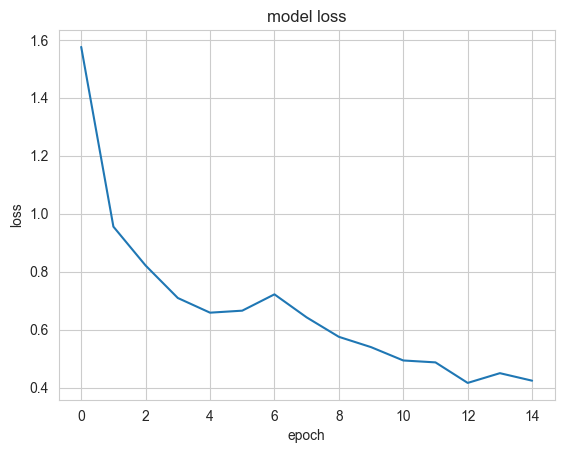

In [24]:
# plot loss
plt.plot(training.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [25]:
# evaluation for training set
model.evaluate(xtrain, ytrain)

13/13 [==============================] - 16s 1s/step - loss: 0.4938 - categorical_accuracy: 0.8275


[0.4937548041343689, 0.8274999856948853]

### Prediction for test set

In [26]:
# calculate predictions for test data
ypred = np.round(model.predict(xtest), 6)
ypred.shape

2/2 [==============================] - 2s 312ms/step


(40, 4)

###  Confusion Matrix

In [27]:
y_pred=np.argmax(ypred, axis=1)
y_test=np.argmax(ytest, axis=1)
cm = confusion_matrix(y_test, y_pred, normalize='true')
# cm = confusion_matrix(y_test, y_pred, normalize='pred')
# cm = confusion_matrix(y_test, y_pred, normalize='pred')
print(cm)

[[0.9 0.  0.  0.1]
 [0.  0.6 0.2 0.2]
 [0.  0.3 0.3 0.4]
 [0.  0.1 0.5 0.4]]


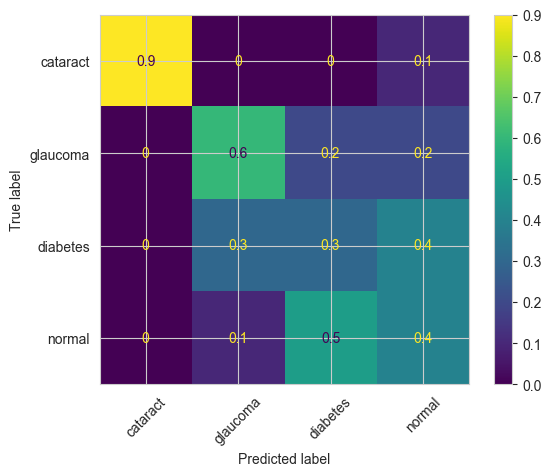

In [28]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
tick_marks = np.arange(len(CLASSES))
plt.xticks(tick_marks, CLASSES, rotation=45)
plt.yticks(tick_marks, CLASSES)
plt.show()

In [29]:
model.evaluate(xtest, ytest)

2/2 [==============================] - 2s 310ms/step - loss: 1.0723 - categorical_accuracy: 0.5500


[1.072261095046997, 0.550000011920929]

### Test images

In [30]:
def predict(image_path):
    """
    This function loads and image, processes the image and makes a prediction.
    """
    # load image
    img = image.load_img(path=image_path,target_size=(224,224))
    # process image
    img_array = image.img_to_array(img)
    img_batch = np.array([img_array])
    preprocessed_img = preprocess_input(img_batch)
    
    # make prediction
    probabilities = model.predict(preprocessed_img,verbose=0)
    # round preciction 
    probabilities = np.round(probabilities,3)[0]
    class_probabilities = dict(zip(CLASSES,probabilities))
    
    plt.bar(range(len(class_probabilities)), list(class_probabilities.values()), align='center')
    plt.xticks(range(len(class_probabilities)), list(class_probabilities.keys()))
        
    
    # return probailities and image
    return plt.show(), display(img) # with img.show()image will be pop up

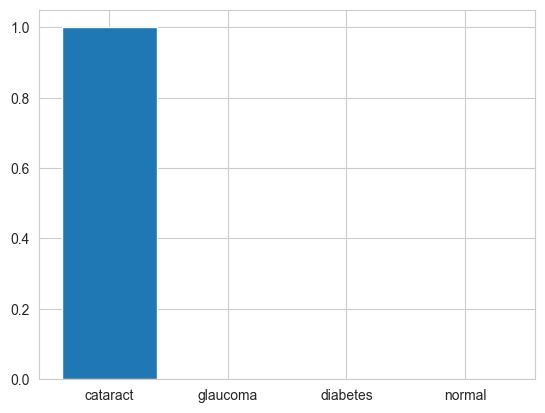

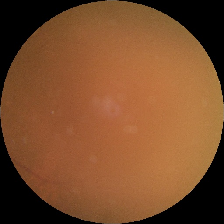

(None, None)

In [33]:
predict('data/test/cataract/24_right.jpg')

In [34]:
model.save("models/model_Incept_local_0503.h5")

# Fine Tuning - 

In [35]:
# Unfreeze the base model
base_model.trainable = True

In [36]:
# compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5), 
    loss=keras.losses.categorical_crossentropy,
    metrics=[keras.metrics.categorical_accuracy]
    )

In [37]:
# early stopping
stop_early = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10
)

In [ ]:
# Train end-to-end. Be careful to stop before you overfit!
# train model
training = model.fit(
            xtrain,
            ytrain,
            epochs=100,
            batch_size=20,
            callbacks=[stop_early],
            validation_split=0.2
)

Epoch 1/100
16/16 [==============================] - 61s 4s/step - loss: 1.8791 - categorical_accuracy: 0.3656 - val_loss: 1.1982 - val_categorical_accuracy: 0.5000
Epoch 2/100
16/16 [==============================] - 57s 4s/step - loss: 1.2113 - categorical_accuracy: 0.5063 - val_loss: 1.2044 - val_categorical_accuracy: 0.5000
Epoch 3/100
16/16 [==============================] - 58s 4s/step - loss: 0.8987 - categorical_accuracy: 0.6125 - val_loss: 1.2180 - val_categorical_accuracy: 0.5250
Epoch 4/100
16/16 [==============================] - 100s 6s/step - loss: 0.6942 - categorical_accuracy: 0.7312 - val_loss: 1.2547 - val_categorical_accuracy: 0.4750
Epoch 5/100
16/16 [==============================] - 114s 7s/step - loss: 0.6714 - categorical_accuracy: 0.7312 - val_loss: 1.2876 - val_categorical_accuracy: 0.4750
Epoch 6/100
16/16 [==============================] - 113s 7s/step - loss: 0.5765 - categorical_accuracy: 0.7781 - val_loss: 1.2654 - val_categorical_accuracy: 0.4750
Epoch 7

In [ ]:
# plot loss
plt.plot(training.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# evaluation for training set
model.evaluate(xtrain, ytrain)

In [ ]:
model.evaluate(xtest, ytest)

In [ ]:
# calculate predictions for test data
ypred = np.round(model.predict(xtest), 6)
ypred.shape

In [ ]:
y_pred=np.argmax(ypred, axis=1)
y_test=np.argmax(ytest, axis=1)
cm = confusion_matrix(y_test, y_pred, normalize='true')
# cm = confusion_matrix(y_test, y_pred, normalize='pred')
# cm = confusion_matrix(y_test, y_pred, normalize='pred')
print(cm)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
tick_marks = np.arange(len(CLASSES))
plt.xticks(tick_marks, CLASSES, rotation=45)
plt.yticks(tick_marks, CLASSES)
plt.show()